### Data Diri

#### Nama : Muhammad Wahyu Fadli
#### Domisili/Kota : Kota Palembang, Sumatera Selatan

In [1]:
# Import library tensorflow
import tensorflow as tf

In [2]:
# Mengunduh dataset gunting, batu, kertas
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

--2021-05-09 10:34:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  1.04MB/s    in 5m 5s   

2021-05-09 10:39:59 (1.01 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [3]:
# Melakukan ekstrak file zip

import zipfile, os

local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [4]:
# melihat isi dari direktori rps-cv-images (sebelum)
os.listdir(base_dir)

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

In [5]:
# melakukan split folders agar dibuat folder train dan validation sebesar 60%:40%
!pip install split_folders
import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors/rps-cv-images', seed=1337, ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 3577.36 files/s]


In [6]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'scissors', 'README_rpc-cv-images.txt', 'val', 'train', 'paper']

In [7]:
# Membuat variabel untuk direktori train dan validation

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
# Menampung direktori dari setiap kelas pada direktori train dan direktori validation
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [119]:
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size = (150,150),
                batch_size = 4,
                class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size = (150,150),
                batch_size = 4,
                class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [120]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [125]:
# Membuat fungsi callback untuk memberhentikan training jika hasil akurasi yang diinginkan telah didapat

accuracy_threshold = 0.92

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > accuracy_threshold):
            print('Akurasi yang diinginkan telah didapatkan, yaitu {}. Maka training berhenti !'.format(accuracy_threshold*100))
            self.model.stop_training=True
    
callbacks = myCallback()

In [132]:
# Membangun arsitektur

model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(37, (3,3), activation='relu', input_shape=(150, 150, 3)),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Conv2D(70, (3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Conv2D(175, (3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Conv2D(270, (3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dropout(0.4),
              tf.keras.layers.Dense(512, activation='relu'),
              tf.keras.layers.Dense(3, activation='softmax')
])

In [133]:
# Menentukan loss function dan optimizers. Menggunakan metrics accuracy untuk mendapatkan hasil nilai akurasi selamaa dilakukan training
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Nadam(),
              metrics=['accuracy'])

In [134]:
# Melakukan training terhadap model
history = model.fit(
              train_generator,
              steps_per_epoch=30, 
              epochs=17, 
              validation_data=validation_generator, 
              validation_steps=5,  
              verbose=1,
              callbacks=[callbacks])

Epoch 1/17
30/30 [==============================] - 2s 46ms/step - loss: 1.1509 - accuracy: 0.3929 - val_loss: 1.0784 - val_accuracy: 0.5500
Epoch 2/17
30/30 [==============================] - 1s 39ms/step - loss: 1.1360 - accuracy: 0.4270 - val_loss: 1.0699 - val_accuracy: 0.5000
Epoch 3/17
30/30 [==============================] - 1s 38ms/step - loss: 1.1490 - accuracy: 0.5304 - val_loss: 1.0610 - val_accuracy: 0.3500
Epoch 4/17
30/30 [==============================] - 1s 39ms/step - loss: 1.1844 - accuracy: 0.4611 - val_loss: 0.9618 - val_accuracy: 0.6500
Epoch 5/17
30/30 [==============================] - 1s 40ms/step - loss: 1.1750 - accuracy: 0.4417 - val_loss: 0.7896 - val_accuracy: 0.7000
Epoch 6/17
30/30 [==============================] - 1s 40ms/step - loss: 0.9219 - accuracy: 0.6372 - val_loss: 0.4995 - val_accuracy: 0.8000
Epoch 7/17
30/30 [==============================] - 1s 39ms/step - loss: 0.6354 - accuracy: 0.7638 - val_loss: 0.5653 - val_accuracy: 0.8000
Epoch 8/17
30

In [135]:
import matplotlib.pyplot as plt

# Melakukan semua list data pada history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


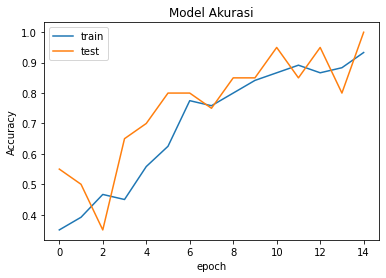

In [138]:
# Membuat plotting untuk akurasi

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Akurasi')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='best')
plt.show()

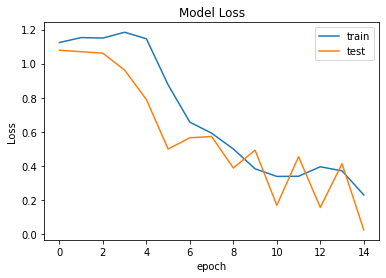

In [139]:
# Membuat plotting untuk Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='best')
plt.show()

Saving 3bkC6JAPog7xX9WO.png to 3bkC6JAPog7xX9WO.png
3bkC6JAPog7xX9WO.png
scissors


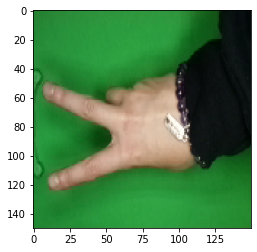

In [147]:
# Melakukan Prediksi Gambar dengan Dataset yang diberikan

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
      print('paper')
  elif classes[0,1]!=0:
      print('rock')
  else:
      print('scissors')

Saving 20210509_202415.jpg to 20210509_202415.jpg
20210509_202415.jpg
paper


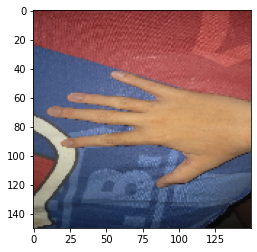

In [148]:
# Melakukan Prediksi Gambar dengan hasil image tangan diri sendiri

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
      print('paper')
  elif classes[0,1]!=0:
      print('rock')
  else:
      print('scissors')